In [1]:
# importing library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [2]:
df1=pd.read_csv("G:/csv_files/takehome_user_engagement.csv",date_parser=True)
df1.head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
# there is no missing values
df1.isna().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [4]:
# the time_stamp column is not in datetime format
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
df1["time_stamp"]=pd.to_datetime(df1.time_stamp)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [7]:
# the entries are containig single day logged in members so grouping them to 1w to see the count of visited
df1=df1.groupby([pd.Grouper(key="time_stamp", freq="1W"),"user_id"]).agg("count")

In [8]:
df1.head(5)

visited
time_stamp user_id         
2012-06-03 563            1
           1693           1
           1995           1
           2120           1
           2136           1

# Defining an "adopted user" as a user who has logged into the product on three separate days in at least one sevenday period

In [9]:
df1=df1[df1["visited"]>2]

In [10]:
df1.head(20)

visited
time_stamp user_id         
2012-06-10 1693           3
2012-06-17 728            4
           11764          3
2012-06-24 1693           3
           5297           3
2012-07-01 6171           3
2012-07-08 69             4
           1693           3
           2078           3
           3623           3
           5297           3
           6978           3
           7590           3
           9510           3
2012-07-15 510            5
           1280           4
           1339           3
           6978           4
           7529           6
           7991           3

In [11]:
# the userid members are considered as adopted users 
s=set()
for i,j in df1.index:
    s.add(j)
s=list(s)
s.sort()

In [12]:
# the adopted users are
s[:5]

[2, 10, 20, 33, 42]

In [13]:
df2=pd.read_csv("G:/csv_files/takehome_users.csv",sep=',', encoding='latin-1',index_col="object_id")
df2.head(5)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [14]:
df2.isna().sum()

creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [15]:
# if invited by user is not applicable then we can but zero
df2["last_session_creation_time"].fillna(df2["last_session_creation_time"].mean(),inplace=True)
df2["invited_by_user_id"].fillna(0,inplace=True)

In [16]:
df2.isna().sum()

creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_time               12000 non-null  object 
 1   name                        12000 non-null  object 
 2   email                       12000 non-null  object 
 3   creation_source             12000 non-null  object 
 4   last_session_creation_time  12000 non-null  float64
 5   opted_in_to_mailing_list    12000 non-null  int64  
 6   enabled_for_marketing_drip  12000 non-null  int64  
 7   org_id                      12000 non-null  int64  
 8   invited_by_user_id          12000 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 937.5+ KB


In [18]:
df2["is_adopted_user"]=0
df2.loc[s,"is_adopted_user"]=1

In [19]:
df2.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,is_adopted_user
object_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [20]:
# not needed
df2.drop(["name","email","creation_time"],inplace=True,axis=1)

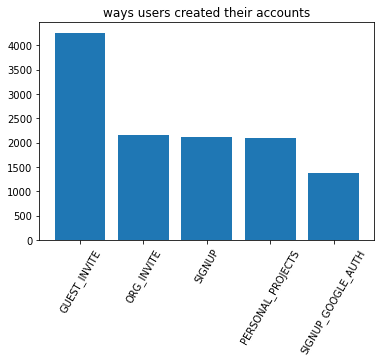

In [24]:
plt.bar(x=df2["creation_source"].unique(),height=df2["creation_source"].value_counts())
plt.xticks(rotation=60)
plt.title("ways users created their accounts")
plt.savefig('creation_source.jpg')
plt.show()
# plt.savefig('creation_source.jpg')

most of the users were created their account as guest

# 1. is adopted people opted for marketting drip??

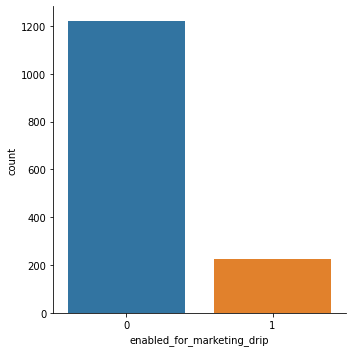

In [36]:
sns.catplot(x="enabled_for_marketing_drip",kind="count",data=df2[df2["is_adopted_user"]==1])

# among adopted users only few enabled...

# 2. people invited by users is getting  adopted ??

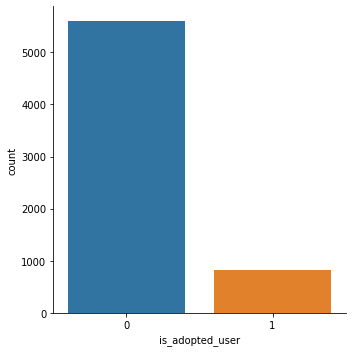

In [37]:
sns.catplot(x="is_adopted_user",kind="count",data=df2[df2["invited_by_user_id"]!=0])

In [38]:
var=df2[(df2["invited_by_user_id"]!=0) & (df2["is_adopted_user"]==1)].shape[0]/df2[df2["invited_by_user_id"]!=0].shape[0]
print("------------------------------------------------------------------------------")
print(f"Precentage of people invited by users is converted into adopted users is {round(var,3)}")
print("------------------------------------------------------------------------------")

------------------------------------------------------------------------------
Precentage of people invited by users is converted into adopted users is 0.127
------------------------------------------------------------------------------


# 3. In which organisation where most of the people are adopted users

In [39]:
list=[]
for i in df2["org_id"].unique():
    num=df2[ (df2["is_adopted_user"]==1) & (df2["org_id"]==i) ].shape[0]
    denom=df2[df2["org_id"]==i].shape[0]
    list.append((i,round(num/denom,2)))

In [40]:
list.sort(key=lambda x:x[1],reverse=True)

In [41]:
list[:20]
print(f"the following gropus has highest percentage of adopted users:")
for i,j in list[:10]:
    print (f"the group is-->{i}    and it has percentage of adopted users -->{j}")

the following gropus has highest percentage of adopted users:
the group is-->387    and it has percentage of adopted users -->0.5
the group is-->235    and it has percentage of adopted users -->0.46
the group is-->270    and it has percentage of adopted users -->0.43
the group is-->415    and it has percentage of adopted users -->0.38
the group is-->399    and it has percentage of adopted users -->0.38
the group is-->400    and it has percentage of adopted users -->0.38
the group is-->345    and it has percentage of adopted users -->0.36
the group is-->318    and it has percentage of adopted users -->0.35
the group is-->306    and it has percentage of adopted users -->0.33
the group is-->281    and it has percentage of adopted users -->0.33


Text(0, 0.5, 'percentage of adopted users in their group')

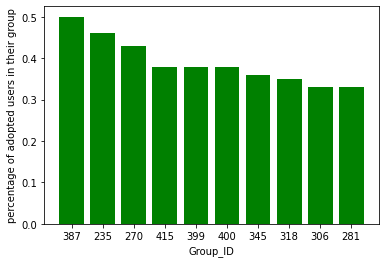

In [42]:
plt.bar(x=[str(i) for i,j in list[:10]],height=[j for i,j in list[:10]],color="g")
plt.xlabel("Group_ID")
plt.ylabel("percentage of adopted users in their group")

# 4.is there chance of getting adopted user  when people is invited by user id?

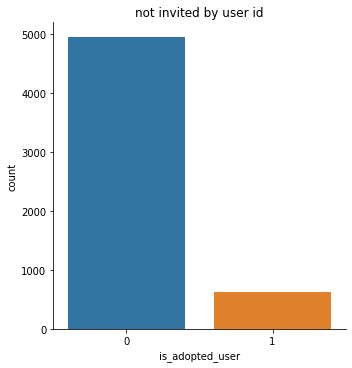

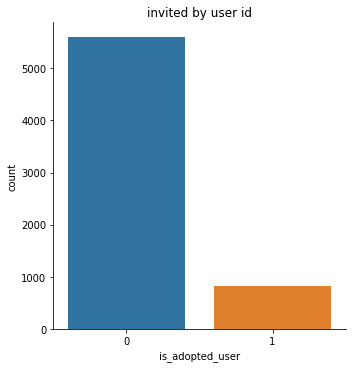

In [43]:
sns.catplot(x="is_adopted_user",kind="count",data=df2[df2["invited_by_user_id"]==0])
plt.title("not invited by user id")
plt.show()
sns.catplot(x="is_adopted_user",kind="count",data=df2[df2["invited_by_user_id"]!=0])
plt.title("invited by user id")
plt.show()

# there is no influence of invite by userids in becoming adopted users

In [44]:
# since creation_source is catagorical 
df2=pd.get_dummies(df2,"creation_source",drop_first=True)


In [45]:
x=df2.drop("is_adopted_user",axis=1)
y=df2["is_adopted_user"]

In [46]:
# since it is not balanced so smote is used to balance the minority
y.value_counts()

0    10555
1     1445
Name: is_adopted_user, dtype: int64

In [47]:
from imblearn.over_sampling import SMOTE
smote=SMOTE( sampling_strategy="minority")

In [48]:
balanced_x,balanced_y= smote.fit_resample(x,y)

In [49]:
balanced_y.value_counts()

0    10555
1    10555
Name: is_adopted_user, dtype: int64

In [50]:
x_train,x_test,y_train,y_test=train_test_split(balanced_x,balanced_y,random_state=20,test_size=.30)

In [51]:
len(x_train),len(x_test)

(14777, 6333)

In [52]:
y_test.value_counts()

1    3169
0    3164
Name: is_adopted_user, dtype: int64

In [53]:
# lets normalise the data
st=StandardScaler()
st.fit(x_train)
x_train=st.transform(x_train)
x_test=st.transform(x_test)

In [54]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [55]:
train_score=cross_val_score(lr,x_train,y_train,scoring="roc_auc")
print("the AUC score for training data:",train_score.mean())

the AUC score for training data: 0.9211885835611806


In [56]:
from sklearn.metrics import classification_report,roc_curve,roc_auc_score

In [57]:
y_pred=lr.predict(x_test)

In [58]:
print(classification_report(y_pred=y_pred,y_true=y_test,target_names=["not adopted","adopted"]))

              precision    recall  f1-score   support

 not adopted       0.86      0.83      0.84      3164
     adopted       0.84      0.86      0.85      3169

    accuracy                           0.85      6333
   macro avg       0.85      0.85      0.85      6333
weighted avg       0.85      0.85      0.85      6333



In [59]:
y_pred_proba=lr.predict_proba(x_test)


In [60]:
y_pred_proba[:,1]

array([0.01986825, 0.95576475, 0.00411788, ..., 0.12622268, 0.2360025 ,
       0.96367213])

In [61]:
fpr, tpr, thresholds=roc_curve(y_test,y_pred_proba[:,1])

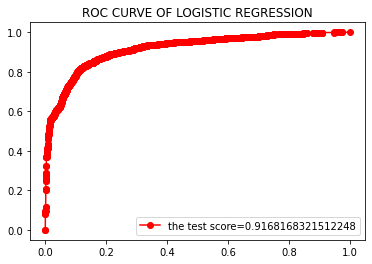

In [62]:
score=roc_auc_score(y_test,y_pred_proba[:,1])
plt.plot(fpr, tpr,drawstyle="steps-post",marker="o",label=f"the test score={score}",color="r")
plt.legend(loc='lower right')
plt.title("ROC CURVE OF LOGISTIC REGRESSION")
plt.show()

In [63]:
lr.coef_

array([[ 1.85485979, -0.27575465, -0.19623265,  0.21553232, -0.40462302,
        -0.83680697, -1.08249653, -0.90798589, -0.77641877]])

In [64]:
result=[*zip(x.columns,lr.coef_[0])]
result.sort(reverse=True,key=lambda x:abs(x[1]))
final=pd.DataFrame({"features":[i for i,j in result],"Their importance":[j for i,j in result]})

# based on last login or if he is invited as invited to join another user's personal workspace or if signed up via the website can be considered as adopted user

"=================================================================================================================="

import dataframe_image as dfi
dfi.export(final, 'dataframe.jpg')